<a href="https://colab.research.google.com/github/Shayan007/ML-Project/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Importing Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/credit_risk_dataset.csv')

## **Understanding Data**

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
df.shape

(32581, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
df.duplicated().sum()

165

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(32416, 12)

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173293,0.163001,0.050680,0.011760,-0.022698,-0.042300,0.859215
person_income,0.173293,1.000000,0.133903,0.265947,0.000878,-0.145005,-0.254472,0.117614
person_emp_length,0.163001,0.133903,1.000000,0.113183,-0.056607,-0.082817,-0.053999,0.144889
loan_amnt,0.050680,0.265947,0.113183,1.000000,0.146937,0.105736,0.572824,0.041865
loan_int_rate,0.011760,0.000878,-0.056607,0.146937,1.000000,0.335853,0.120207,0.015896
loan_status,-0.022698,-0.145005,-0.082817,0.105736,0.335853,1.000000,0.379697,-0.016498
loan_percent_income,-0.042300,-0.254472,-0.053999,0.572824,0.120207,0.379697,1.000000,-0.031457
cb_person_cred_hist_length,0.859215,0.117614,0.144889,0.041865,0.015896,-0.016498,-0.031457,1.000000


In [14]:
df.corr()['loan_status']

<ipython-input-14-98d2a9ed37ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_status']


person_age                   -0.022698
person_income                -0.145005
person_emp_length            -0.082817
loan_amnt                     0.105736
loan_int_rate                 0.335853
loan_status                   1.000000
loan_percent_income           0.379697
cb_person_cred_hist_length   -0.016498
Name: loan_status, dtype: float64

## **Univariate Analysis**

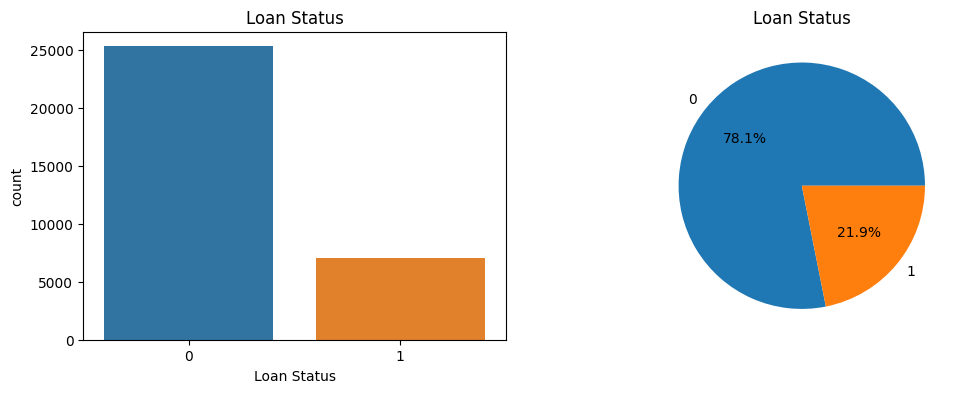

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='loan_status', data=df, ax=axes[0])
axes[0].set_title('Loan Status')
axes[0].set_xlabel('Loan Status')

loan_status_counts = df['loan_status'].value_counts()
axes[1].pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%')
axes[1].set_title('Loan Status')

plt.show()


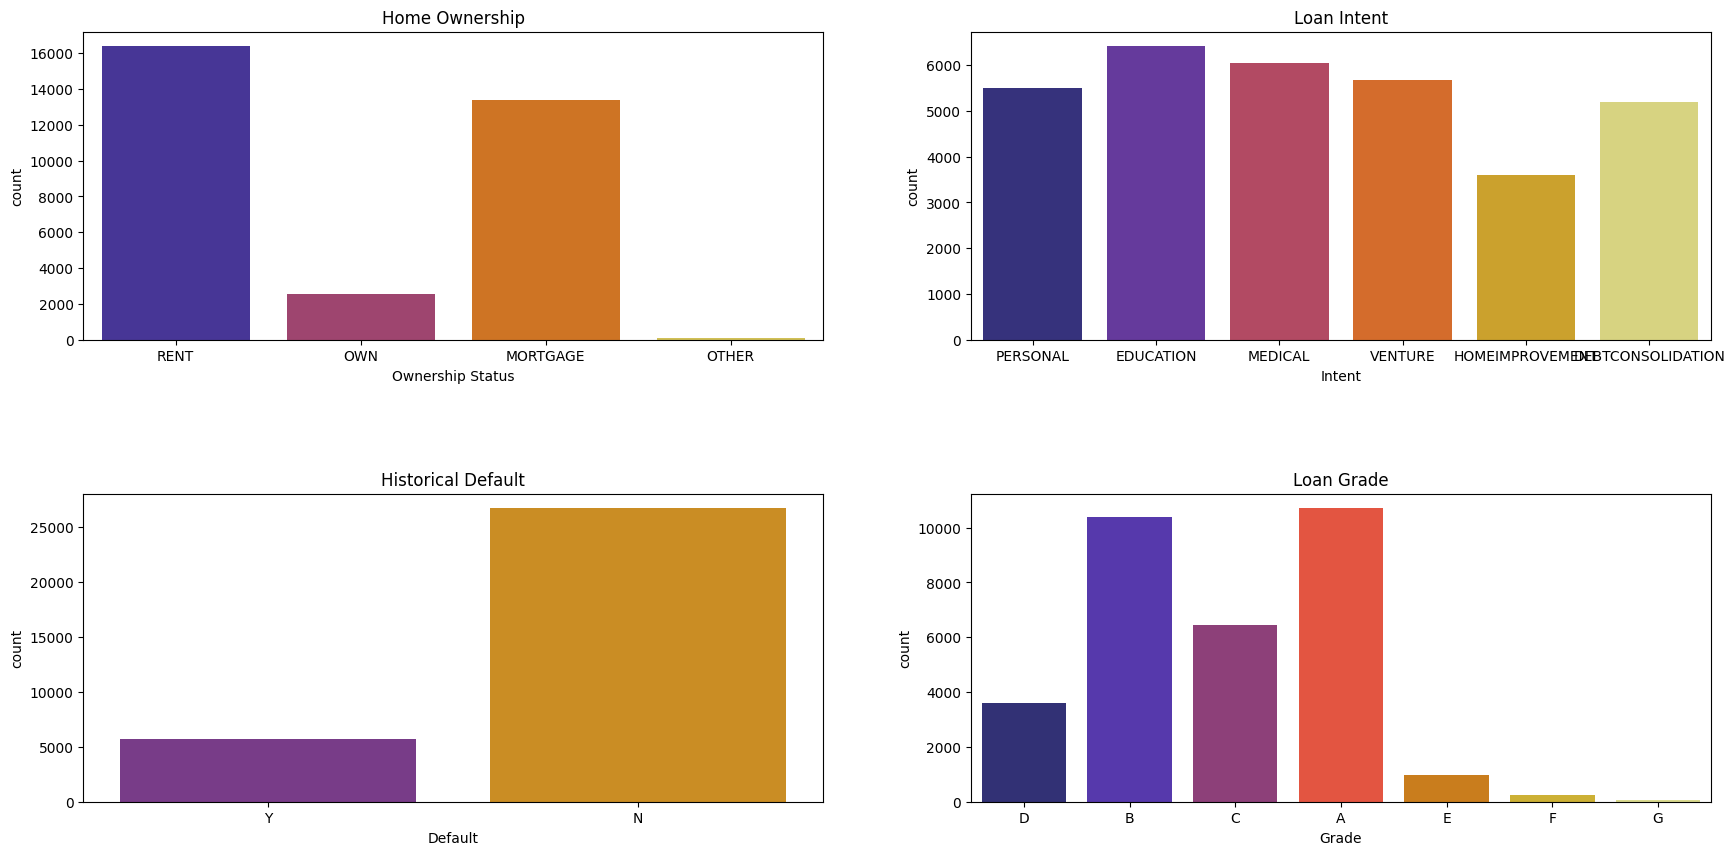

In [16]:
fig,axes = plt.subplots(2, 2, figsize=(21,10))

sns.countplot(x='person_home_ownership',data=df,ax=axes[0,0],palette='CMRmap')
axes[0, 0].set_title('Home Ownership')
axes[0, 0].set_xlabel('Ownership Status')

sns.countplot(x='loan_intent',data=df,ax=axes[0,1],palette='CMRmap')
axes[0, 1].set_title('Loan Intent')
axes[0, 1].set_xlabel('Intent')

sns.countplot(x='loan_grade',data=df,ax=axes[1,1],palette='CMRmap')
axes[1, 1].set_title('Loan Grade')
axes[1, 1].set_xlabel('Grade')

sns.countplot(x='cb_person_default_on_file',data=df,ax=axes[1,0],palette='CMRmap')
axes[1, 0].set_title('Historical Default')
axes[1, 0].set_xlabel('Default')

plt.subplots_adjust(hspace=0.5)

plt.show()

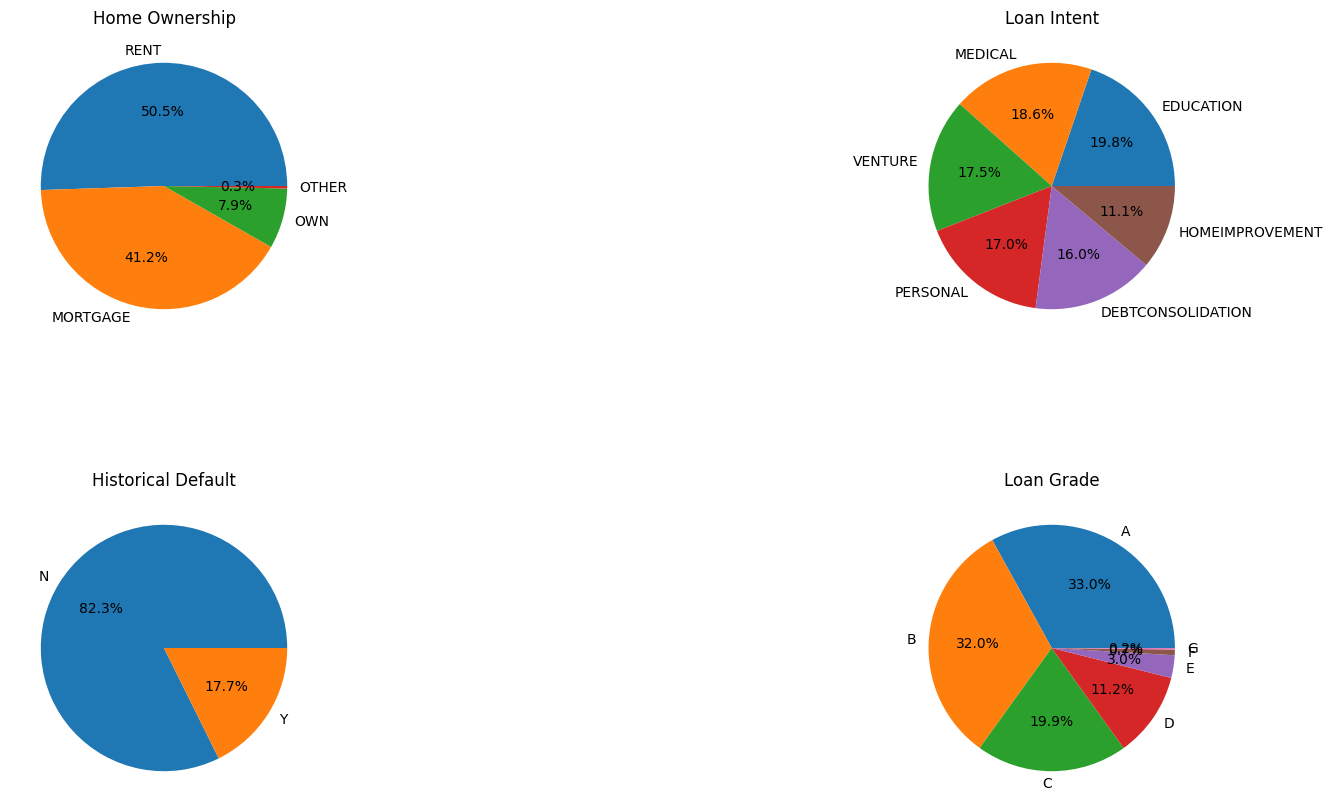

In [17]:
fig,axes = plt.subplots(2, 2, figsize=(21,10))

home_ownership_counts = df['person_home_ownership'].value_counts()
axes[0, 0].pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Home Ownership')

loan_intent_counts = df['loan_intent'].value_counts()
axes[0, 1].pie(loan_intent_counts, labels=loan_intent_counts.index, autopct='%1.1f%%')
axes[0, 1].set_title('Loan Intent')

loan_grade_counts = df['loan_grade'].value_counts()
axes[1, 1].pie(loan_grade_counts, labels=loan_grade_counts.index, autopct='%1.1f%%')
axes[1, 1].set_title('Loan Grade')

hist_default_counts = df['cb_person_default_on_file'].value_counts()
axes[1, 0].pie(hist_default_counts, labels=hist_default_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Historical Default')

plt.subplots_adjust(hspace=0.5)

plt.show()

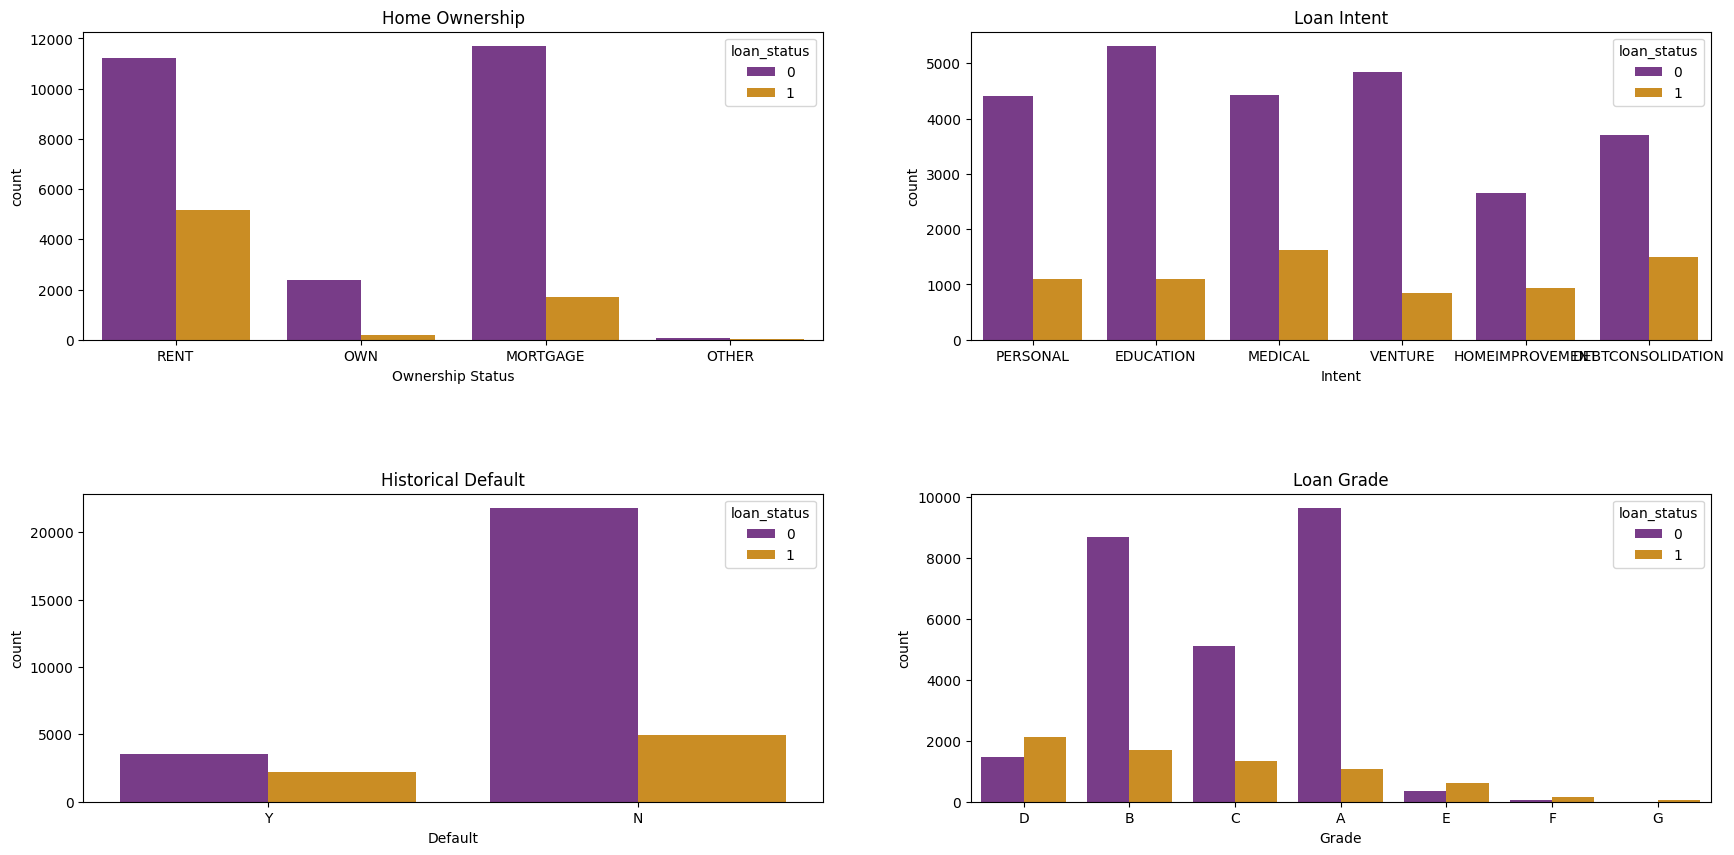

In [18]:
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot(x='person_home_ownership', hue="loan_status",data=df,ax=axes[0,0],palette='CMRmap')
axes[0, 0].set_title('Home Ownership')
axes[0, 0].set_xlabel('Ownership Status')

sns.countplot(x='loan_intent',data=df,hue="loan_status",ax=axes[0,1],palette='CMRmap')
axes[0, 1].set_title('Loan Intent')
axes[0, 1].set_xlabel('Intent')

sns.countplot(x='loan_grade',data=df,hue="loan_status",ax=axes[1,1],palette='CMRmap')
axes[1, 1].set_title('Loan Grade')
axes[1, 1].set_xlabel('Grade')

sns.countplot(x='cb_person_default_on_file',hue="loan_status",data=df,ax=axes[1,0],palette='CMRmap')
axes[1, 0].set_title('Historical Default')
axes[1, 0].set_xlabel('Default')

plt.subplots_adjust(hspace=0.5)

plt.show()

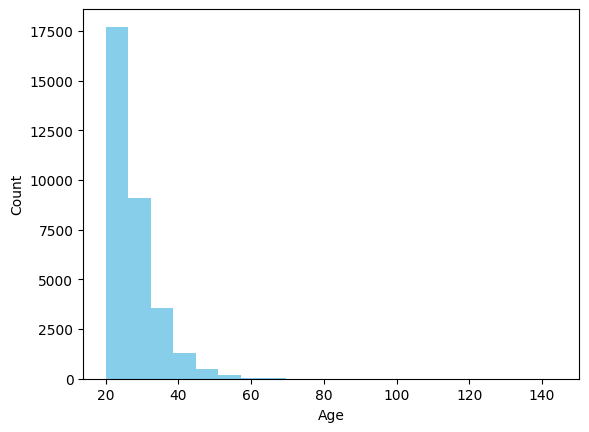

In [19]:
plt.hist(df['person_age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


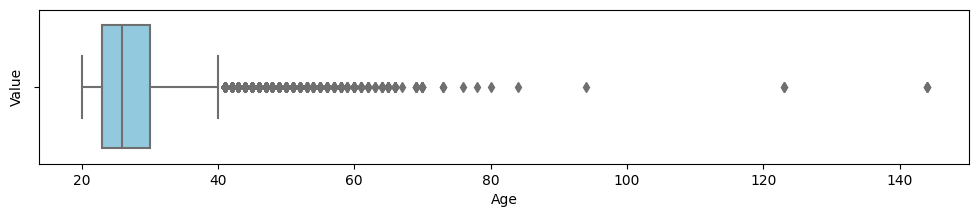

In [20]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=df['person_age'], color='skyblue', orient='v')
plt.xlabel('Age')
plt.ylabel('Value')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


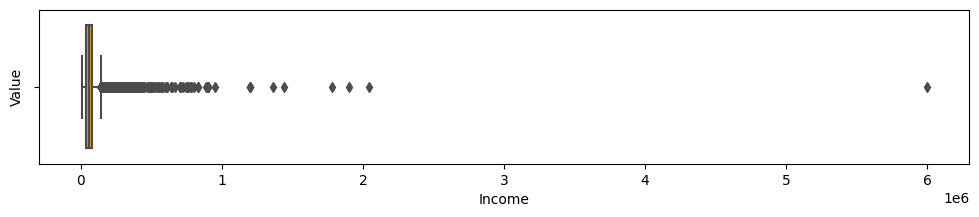

In [21]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=df['person_income'], color='orange', orient='v')
plt.xlabel('Income')
plt.ylabel('Value')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


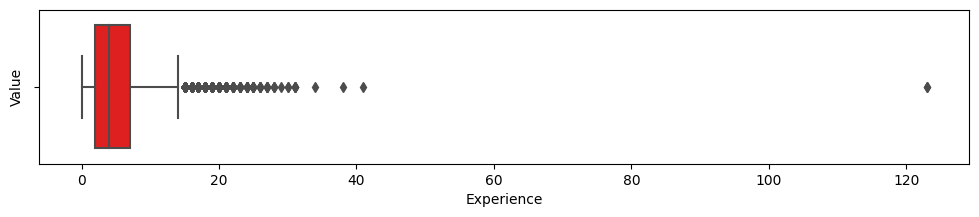

In [22]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=df['person_emp_length'], color='red', orient='v')
plt.xlabel('Experience')
plt.ylabel('Value')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


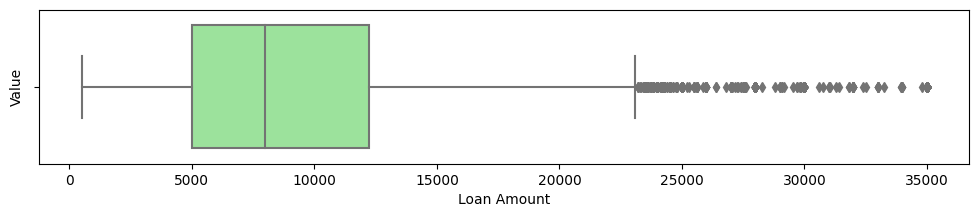

In [23]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=df['loan_amnt'], color='lightgreen', orient='v')
plt.xlabel('Loan Amount')
plt.ylabel('Value')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


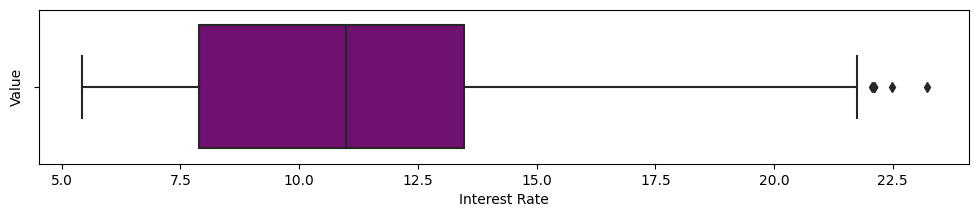

In [24]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=df['loan_int_rate'], color='purple', orient='v')
plt.xlabel('Interest Rate')
plt.ylabel('Value')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


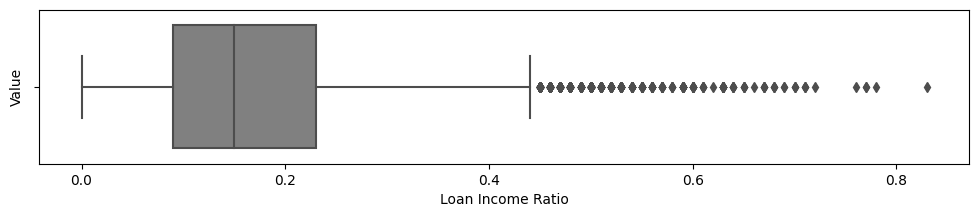

In [25]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=df['loan_percent_income'], color='gray', orient='v')
plt.xlabel('Loan Income Ratio')
plt.ylabel('Value')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


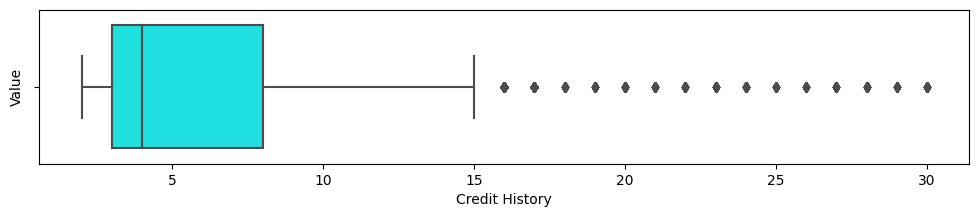

In [26]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=df['cb_person_cred_hist_length'], color='cyan', orient='v')
plt.xlabel('Credit History')
plt.ylabel('Value')

plt.show()

## **Bivariate & Multivariate Analysis**

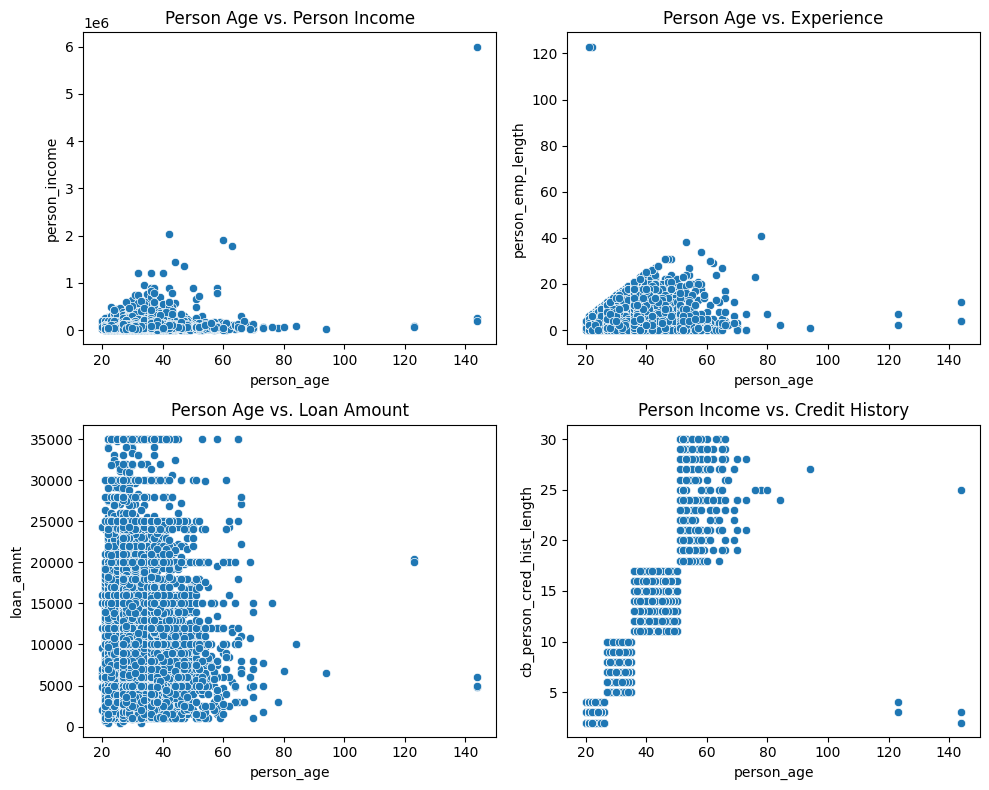

In [27]:
plt.figure(figsize=(10, 8))

# First Scatter Plot
plt.subplot(221)
sns.scatterplot(x=df["person_age"], y=df["person_income"])
plt.title("Person Age vs. Person Income")

# Second Scatter Plot
plt.subplot(222)
sns.scatterplot(x=df["person_age"], y=df["person_emp_length"])
plt.title("Person Age vs. Experience")

# Third Scatter Plot
plt.subplot(223)
sns.scatterplot(x=df["person_age"], y=df["loan_amnt"])
plt.title("Person Age vs. Loan Amount")

# Fourth Scatter Plot

plt.subplot(224)
sns.scatterplot(x=df["person_age"], y=df["cb_person_cred_hist_length"])
plt.title("Person Income vs. Credit History")

plt.tight_layout()

plt.show()

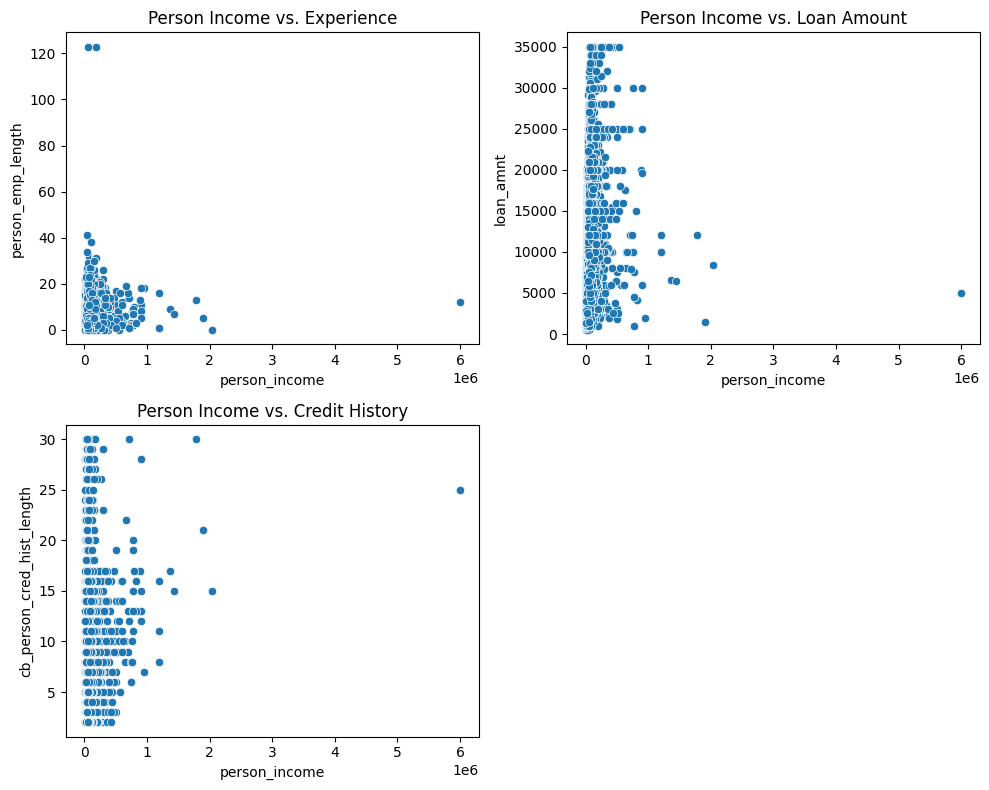

In [28]:
plt.figure(figsize=(10, 8))

# First Scatter Plot
plt.subplot(221)
sns.scatterplot(x=df["person_income"], y=df["person_emp_length"])
plt.title("Person Income vs. Experience")

# Second Scatter Plot
plt.subplot(222)
sns.scatterplot(x=df["person_income"], y=df["loan_amnt"])
plt.title("Person Income vs. Loan Amount")

# Third Scatter Plot
plt.subplot(223)
sns.scatterplot(x=df["person_income"], y=df["cb_person_cred_hist_length"])
plt.title("Person Income vs. Credit History")

plt.tight_layout()

plt.show()

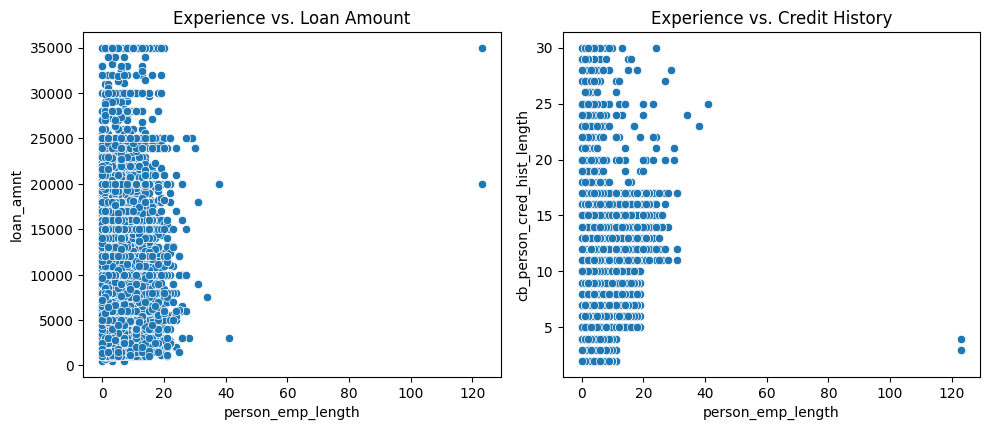

In [29]:
plt.figure(figsize=(10, 8))

# First Scatter Plot
plt.subplot(221)
sns.scatterplot(x=df["person_emp_length"], y=df["loan_amnt"])
plt.title("Experience vs. Loan Amount")

# Second Scatter Plot
plt.subplot(222)
sns.scatterplot(x=df["person_emp_length"], y=df["cb_person_cred_hist_length"])
plt.title("Experience vs. Credit History")

plt.tight_layout()

plt.show()

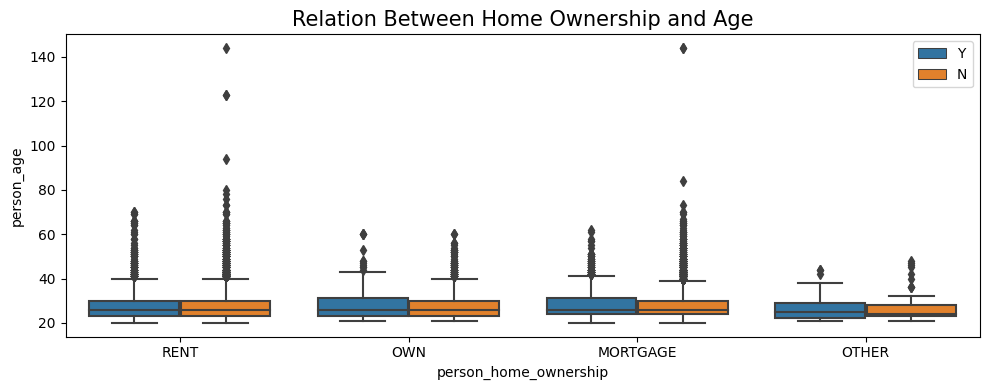

In [30]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x=df["person_home_ownership"], y=df["person_age"], hue=df["cb_person_default_on_file"])
plt.title("Relation Between Home Ownership and Age", size=15)

ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

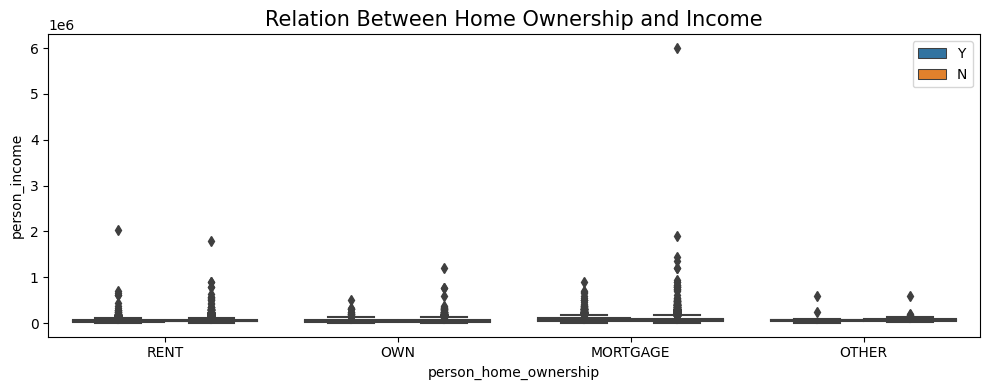

In [31]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x=df["person_home_ownership"], y=df["person_income"], hue=df["cb_person_default_on_file"])
plt.title("Relation Between Home Ownership and Income", size=15)

ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

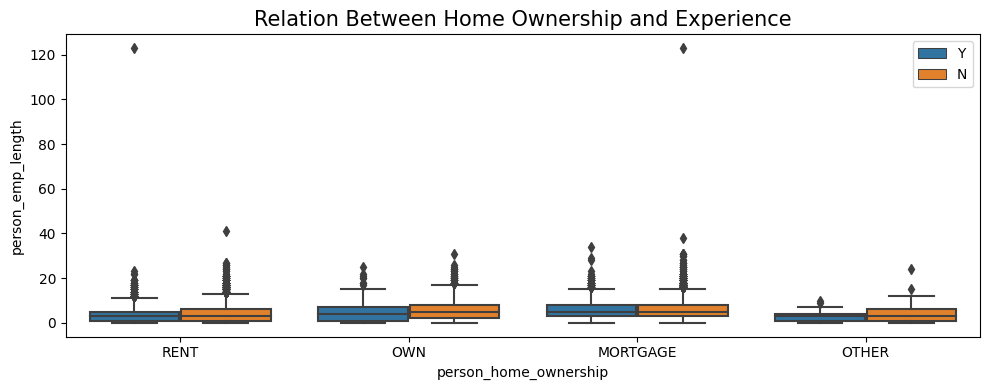

In [32]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x=df["person_home_ownership"], y=df["person_emp_length"], hue=df["cb_person_default_on_file"])
plt.title("Relation Between Home Ownership and Experience", size=15)

ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

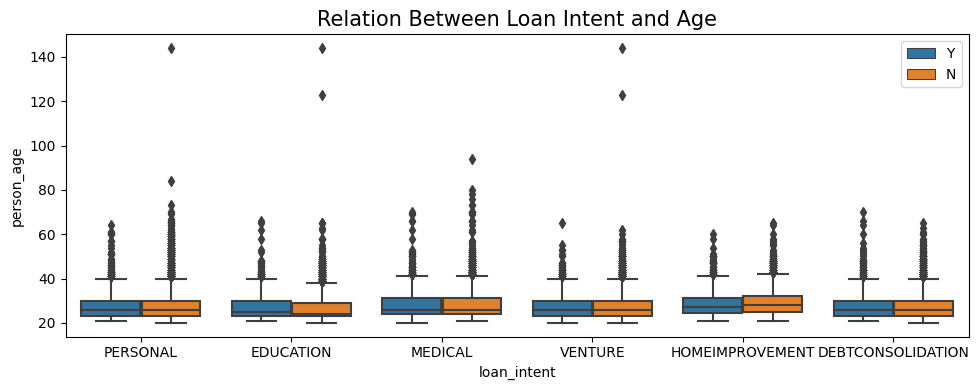

In [33]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x=df["loan_intent"], y=df["person_age"], hue=df["cb_person_default_on_file"])
plt.title("Relation Between Loan Intent and Age", size=15)

ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

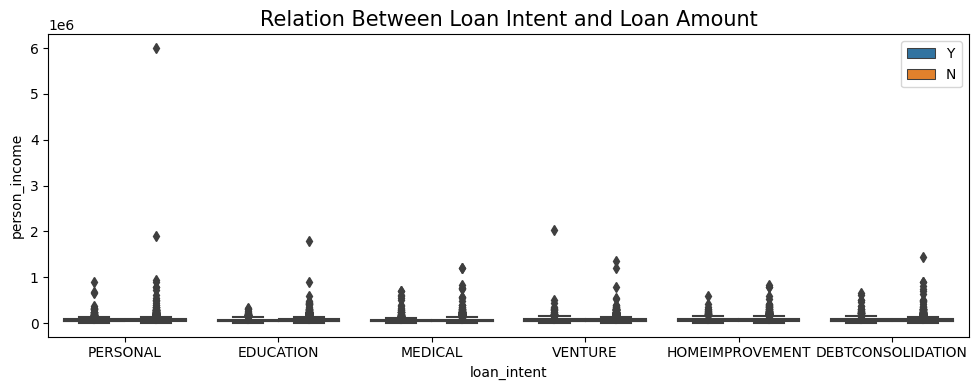

In [34]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x=df["loan_intent"], y=df["person_income"], hue=df["cb_person_default_on_file"])
plt.title("Relation Between Loan Intent and Loan Amount", size=15)

ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

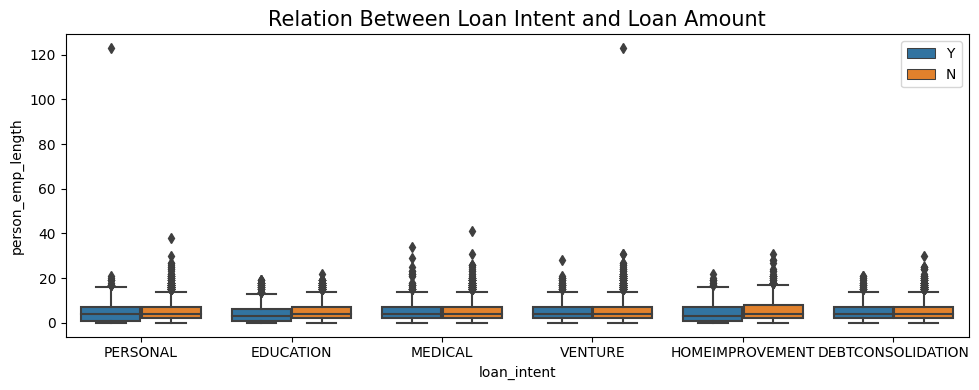

In [35]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x=df["loan_intent"], y=df["person_emp_length"], hue=df["cb_person_default_on_file"])
plt.title("Relation Between Loan Intent and Loan Amount", size=15)

ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

<Axes: xlabel='loan_status', ylabel='person_home_ownership'>

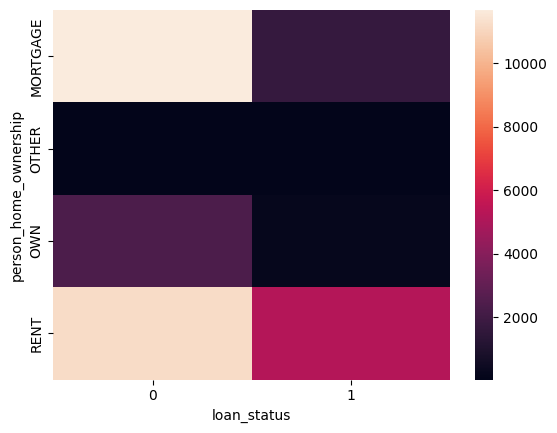

In [36]:
sns.heatmap(pd.crosstab(df["person_home_ownership"], df["loan_status"]))

<Axes: xlabel='loan_status', ylabel='loan_intent'>

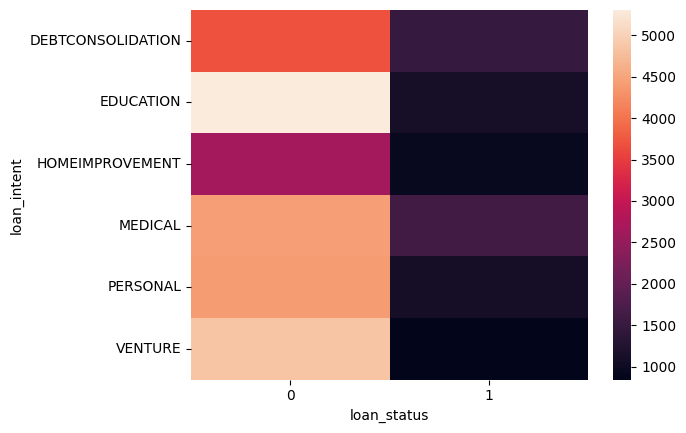

In [37]:
sns.heatmap(pd.crosstab(df["loan_intent"], df["loan_status"]))

<Axes: xlabel='loan_status', ylabel='cb_person_default_on_file'>

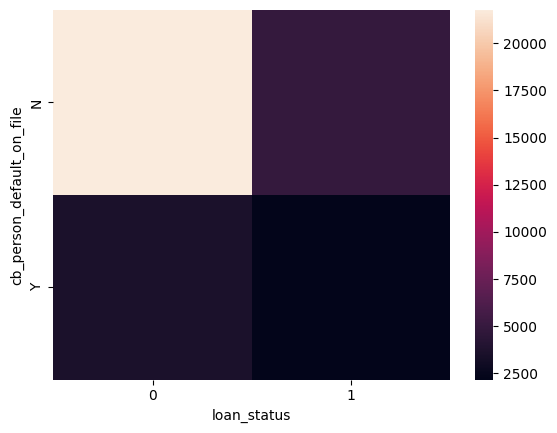

In [38]:
sns.heatmap(pd.crosstab(df["cb_person_default_on_file"], df["loan_status"]))

<ipython-input-39-ef73714dbc7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdBu")


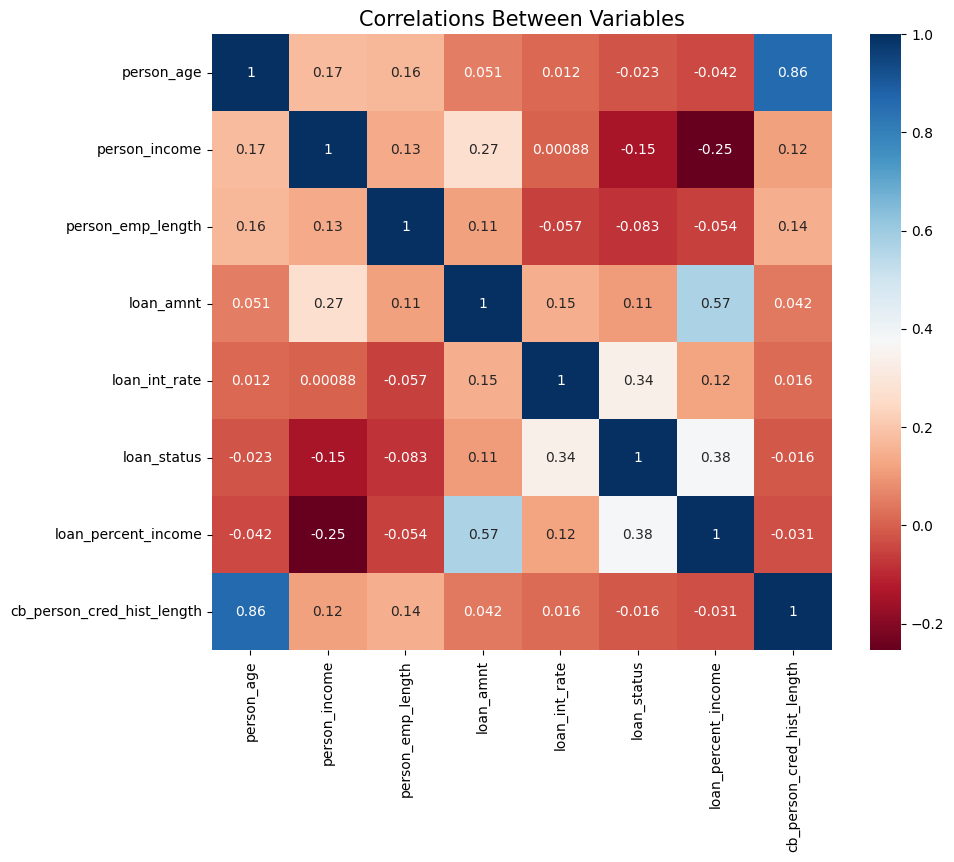

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

## **Data Preprocessing**

### **Handling Missing Values**

In [40]:
Nan_per = df.isnull().sum()/df.shape[0]*100
Nan_per.round(2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.74
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.55
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [41]:
print('person_emp_length mode {}'.format(df['person_emp_length'].mode()[0]))
print('person_emp_length median {}'.format(df['person_emp_length'].median()))
print('loan_int_rate mode {}'.format(df['loan_int_rate'].mode()[0]))
print('loan_int_rate median {}'.format(df['loan_int_rate'].median()))

person_emp_length mode 0.0
person_emp_length median 4.0
loan_int_rate mode 7.51
loan_int_rate median 10.99


In [42]:
df['person_emp_length'].fillna(df['person_emp_length'].mode()[0], inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [43]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### **Handling Outliers**

In [44]:
df = df[df['person_age'] <= 90]
df = df[df['person_emp_length'] <= 50]
df = df[df['person_income'] <= 3000000]

df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32408.000000,3.240800e+04,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000
mean,27.728709,6.589557e+04,4.652061,9592.582078,11.014513,0.218711,0.170245,5.810541
std,6.199621,5.251816e+04,4.057471,6320.959306,3.083152,0.413379,0.106785,4.056254
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [45]:
df.shape

(32408, 12)

### **Feature Encoding**

In [46]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [47]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [48]:
categorical_predictors = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

df2 = pd.get_dummies(df, columns=categorical_predictors)

In [49]:
df2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


### **Feature Selection**

In [50]:
df2 = df2.drop('loan_percent_income', axis=1)

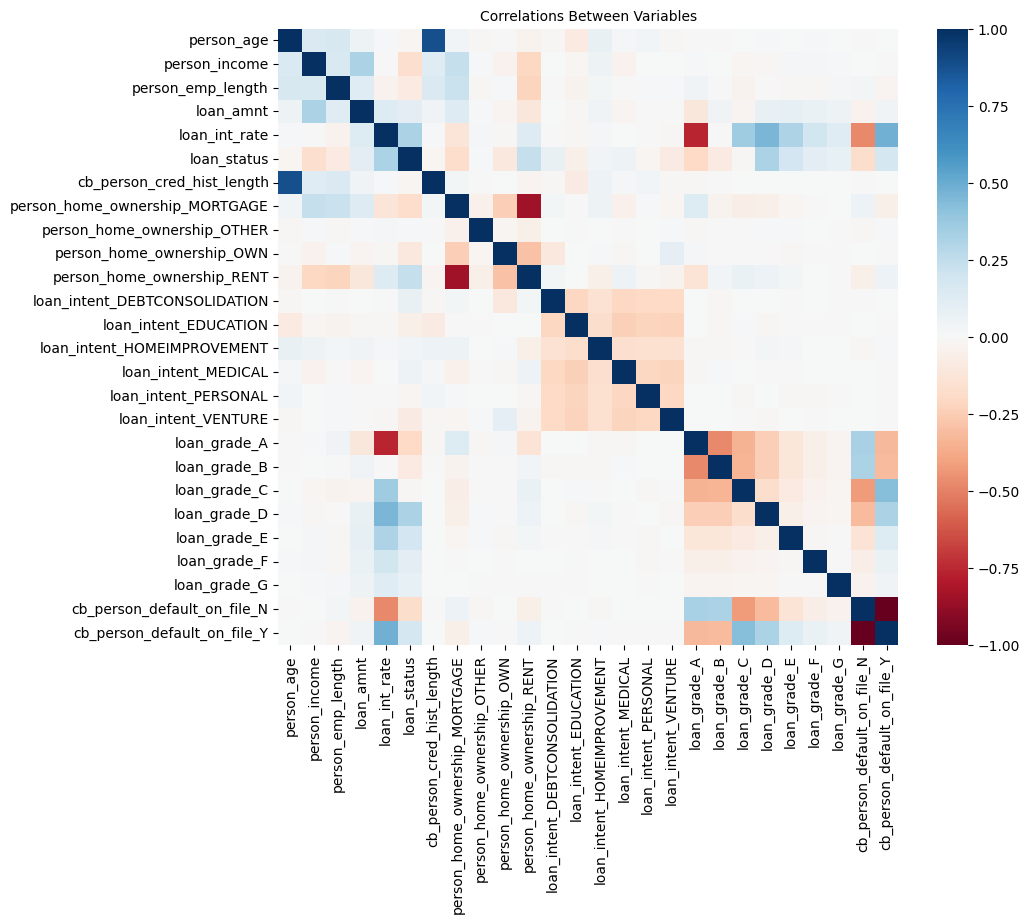

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=False, cmap="RdBu")
plt.title("Correlations Between Variables", size=10)
plt.show()

### **Feature Scaling**

In [52]:
from sklearn.preprocessing import MinMaxScaler

predictors_to_normalize = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']

scaler = MinMaxScaler()

df2[predictors_to_normalize] = scaler.fit_transform(df2[predictors_to_normalize])

In [53]:
df2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,0.015625,0.002751,0.121951,0.014493,0.321348,0,0.000000,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0.078125,0.002751,0.024390,0.144928,0.418539,1,0.035714,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.046875,0.030209,0.097561,1.000000,0.551124,1,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.062500,0.024757,0.195122,1.000000,0.497191,1,0.071429,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,0.015625,0.002898,0.048780,0.057971,0.096629,1,0.000000,0,0,1,...,1,1,0,0,0,0,0,0,1,0


## **Model Training and Evaluation**

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.model_selection import train_test_split

X = df2.drop('loan_status', axis=1)
y = df2['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print(X_train.shape)
print(X_test.shape)

(25926, 25)
(6482, 25)


In [57]:
print(y_train.shape)
print(y_test.shape)

(25926,)
(6482,)


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Initialize the models
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()

# Train the models
knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predict on the test set
knn_test_pred = knn.predict(X_test)
logreg_test_pred = logreg.predict(X_test)
dt_test_pred = dt.predict(X_test)

# Calculate accuracy on the test set
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
logreg_test_accuracy = accuracy_score(y_test, logreg_test_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)

# Calculate F1 score on the test set
knn_f1_score = f1_score(y_test, knn_test_pred)
logreg_f1_score = f1_score(y_test, logreg_test_pred)
dt_f1_score = f1_score(y_test, dt_test_pred)

# Calculate Confusion Matrix on the test set
knn_confusion_matrix = confusion_matrix(y_test, knn_test_pred)
logreg_confusion_matrix = confusion_matrix(y_test, logreg_test_pred)
dt_confusion_matrix = confusion_matrix(y_test, dt_test_pred)

# Print the test accuracies and F1 scores
print("Test Accuracies:")
print("KNN:", knn_test_accuracy)
print("Logistic Regression:", logreg_test_accuracy)
print("Decision Tree:", dt_test_accuracy)
print()
print("F1 Scores:")
print("KNN:", knn_f1_score)
print("Logistic Regression:", logreg_f1_score)
print("Decision Tree:", dt_f1_score)
print()
print("Confusion Matrices:")
print("KNN:")
print(knn_confusion_matrix)
print("Logistic Regression:")
print(logreg_confusion_matrix)
print("Decision Tree:")
print(dt_confusion_matrix)

Test Accuracies:
KNN: 0.8381672323356989
Logistic Regression: 0.8333847577908053
Decision Tree: 0.8838321505708114

F1 Scores:
KNN: 0.5553200508690124
Logistic Regression: 0.5004625346901018
Decision Tree: 0.7386324192988546

Confusion Matrices:
KNN:
[[4778  293]
 [ 756  655]]
Logistic Regression:
[[4861  210]
 [ 870  541]]
Decision Tree:
[[4665  406]
 [ 347 1064]]


### **Balancing Imbalanced Data**

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train1, y_train1 = smote.fit_resample(X, y)

In [60]:
y_train1.value_counts()

0    25320
1    25320
Name: loan_status, dtype: int64

In [61]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(max_depth=5)

knn.fit(X_train1, y_train1)
logreg.fit(X_train1, y_train1)
dt.fit(X_train1, y_train1)

knn_test_pred = knn.predict(X_test)
logreg_test_pred = logreg.predict(X_test)
dt_test_pred = dt.predict(X_test)

knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
logreg_test_accuracy = accuracy_score(y_test, logreg_test_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)

knn_f1_score = f1_score(y_test, knn_test_pred)
logreg_f1_score = f1_score(y_test, logreg_test_pred)
dt_f1_score = f1_score(y_test, dt_test_pred)

knn_confusion_matrix = confusion_matrix(y_test, knn_test_pred)
logreg_confusion_matrix = confusion_matrix(y_test, logreg_test_pred)
dt_confusion_matrix = confusion_matrix(y_test, dt_test_pred)

print("Test Accuracies:")
print("KNN:", knn_test_accuracy)
print("Logistic Regression:", logreg_test_accuracy)
print("Decision Tree:", dt_test_accuracy)
print()
print("F1 Scores:")
print("KNN:", knn_f1_score)
print("Logistic Regression:", logreg_f1_score)
print("Decision Tree:", dt_f1_score)
print()
print("Confusion Matrices:")
print("KNN:")
print(knn_confusion_matrix)
print("Logistic Regression:")
print(logreg_confusion_matrix)
print("Decision Tree:")
print(dt_confusion_matrix)

Test Accuracies:
KNN: 0.8498920086393088
Logistic Regression: 0.775377969762419
Decision Tree: 0.8566800370256094

F1 Scores:
KNN: 0.7284398548702204
Logistic Regression: 0.5932960893854748
Decision Tree: 0.6782126775199169

Confusion Matrices:
KNN:
[[4204  867]
 [ 106 1305]]
Logistic Regression:
[[3964 1107]
 [ 349 1062]]
Decision Tree:
[[4574  497]
 [ 432  979]]


## **Hyperparameter Tuning**

In [64]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan'],
}

logreg_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
}

dt_param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

# Create the classifiers
knn = KNeighborsClassifier()
logreg = LogisticRegression()
dt = DecisionTreeClassifier()

# Perform grid search with cross-validation for each model
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5)
knn_grid_search.fit(X_train1, y_train1)

logreg_grid_search = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, cv=5)
logreg_grid_search.fit(X_train1, y_train1)

dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters and models for each model
knn_best_params = knn_grid_search.best_params_
knn_best_model = knn_grid_search.best_estimator_

logreg_best_params = logreg_grid_search.best_params_
logreg_best_model = logreg_grid_search.best_estimator_

dt_best_params = dt_grid_search.best_params_
dt_best_model = dt_grid_search.best_estimator_

# Evaluate the best models on the test set
knn_y_pred = knn_best_model.predict(X_test)
logreg_y_pred = logreg_best_model.predict(X_test)
dt_y_pred = dt_best_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

knn_f1 = f1_score(y_test, knn_y_pred)
logreg_f1 = f1_score(y_test, logreg_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)

knn_confusion_matrix = confusion_matrix(y_test, knn_y_pred)
logreg_confusion_matrix = confusion_matrix(y_test, logreg_y_pred)
dt_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

print("KNN - Best Hyperparameters:", knn_best_params)
print("KNN - Accuracy:", knn_accuracy)
print("KNN - F1 Score:", knn_f1)
print("KNN - Confusion Matrix:")
print(knn_confusion_matrix)
print("---")
print("Logistic Regression - Best Hyperparameters:", logreg_best_params)
print("Logistic Regression - Accuracy:", logreg_accuracy)
print("Logistic Regression - F1 Score:", logreg_f1)
print("Logistic Regression - Confusion Matrix:")
print(logreg_confusion_matrix)
print("---")
print("Decision Tree - Best Hyperparameters:", dt_best_params)
print("Decision Tree - Accuracy:", dt_accuracy)
print("Decision Tree - F1 Score:", dt_f1)
print("Decision Tree - Confusion Matrix:")
print(dt_confusion_matrix)

KNN - Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3}
KNN - Accuracy: 0.9123727244677569
KNN - F1 Score: 0.827355623100304
KNN - Confusion Matrix:
[[4553  518]
 [  50 1361]]
---
Logistic Regression - Best Hyperparameters: {'C': 10, 'solver': 'saga'}
Logistic Regression - Accuracy: 0.7847886454797902
Logistic Regression - F1 Score: 0.6091342112636593
Logistic Regression - Confusion Matrix:
[[4000 1071]
 [ 324 1087]]
---
Decision Tree - Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2}
Decision Tree - Accuracy: 0.8566800370256094
Decision Tree - F1 Score: 0.6782126775199169
Decision Tree - Confusion Matrix:
[[4574  497]
 [ 432  979]]
